In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns

TODO -- DRAWADOWN GRAPH ⚠️

In [36]:
df = pd.read_csv('Assign1_data.csv', quoting=csv.QUOTE_ALL)

In [37]:
if 'Unnamed: 4' in df.columns:
    df = df.drop(columns=['Unnamed: 4'])

In [38]:
df.head()

,Time,A1,A2,A3
0,1,0.150001,-0.005278,0.023806
1,2,-0.065967,-0.016427,-0.001935
2,3,-0.013223,0.009672,0.006253
3,4,0.024609,0.020163,0.013015
4,5,0.146034,0.021604,0.002158


In [39]:
correlations = df[['A1', 'A2', 'A3']].corr()

In [40]:
correlations

,A1,A2,A3
A1,1.000000,0.026093,-0.005420
A2,0.026093,1.000000,-0.032009
A3,-0.005420,-0.032009,1.000000


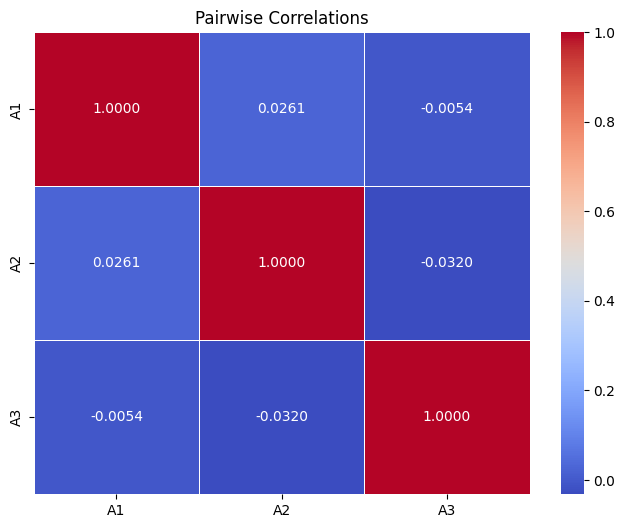

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title('Pairwise Correlations')
plt.show()

In [42]:
cumulative_returns = (1 + df[['A1', 'A2', 'A3']]).cumprod() - 1
best_cumulative = cumulative_returns.iloc[-1].idxmax()

In [43]:
annualized_returns = (1 + cumulative_returns.iloc[-1]) ** (252 / len(df)) - 1
best_annualized = annualized_returns.idxmax()

In [44]:
volatility = df[['A1', 'A2', 'A3']].std() * np.sqrt(252)
lowest_volatility = volatility.idxmin()

In [45]:
sharpe_ratio = (annualized_returns) / volatility
best_sharpe = sharpe_ratio.idxmax()

In [46]:
def max_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

In [47]:
drawdowns = df[['A1', 'A2', 'A3']].apply(max_drawdown)
best_drawdown = drawdowns.idxmax()

In [48]:
print(f"Best Cumulative Return: {best_cumulative}")
print(f"Best Annualized Return: {best_annualized}")
print(f"Lowest Volatility: {lowest_volatility}")
print(f"Best Sharpe Ratio: {best_sharpe}")
print(f"Best Drawdown Resilience: {best_drawdown}")

Best Cumulative Return: A2
Best Annualized Return: A2
Lowest Volatility: A3
Best Sharpe Ratio: A3
Best Drawdown Resilience: A3


### "Best" Series: Depends on the investment objective:

- For Growth/Returns i.e aggressive investors: A2 (highest cumulative/annualized returns).

- For Safety/Stability i.e. risk-averse investors: A3 (best Sharpe Ratio, lowest volatility, and drawdown resilience).

### Conclusion:

- A2 is riskier but more rewarding.

- A3 is safer but less explosive.

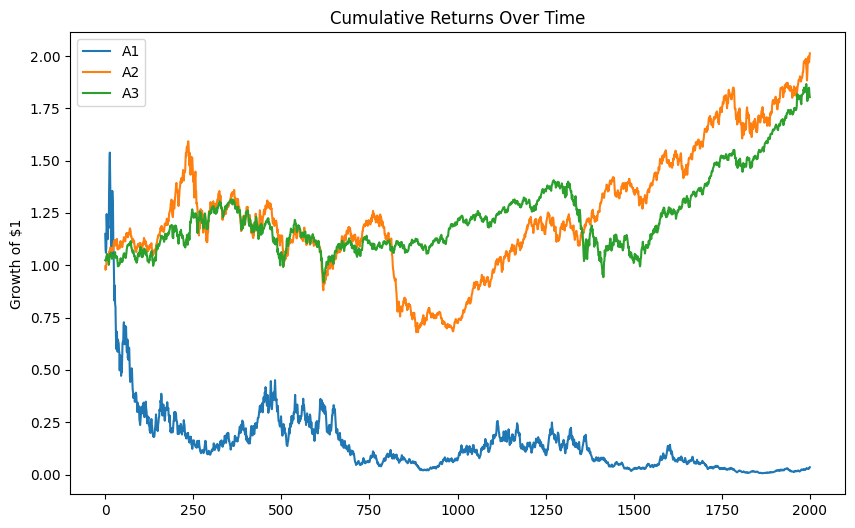

In [49]:
import matplotlib.pyplot as plt

(1 + df[['A1', 'A2', 'A3']]).cumprod().plot(figsize=(10, 6))
plt.title('Cumulative Returns Over Time')
plt.ylabel('Growth of $1')
plt.show()

In [50]:
df['Portfolio'] = df[['A1', 'A2', 'A3']].mean(axis=1)

In [51]:
cumulative_return = (1 + df['Portfolio']).cumprod().iloc[-1] - 1

In [52]:
annualized_return = (1 + cumulative_return) ** (252 / len(df)) - 1

In [53]:
annualized_volatility = df['Portfolio'].std() * np.sqrt(252)

In [54]:
risk_free_rate = 0.02  # Assuming a 2% annual risk-free rate
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

In [55]:
def max_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

portfolio_drawdown = max_drawdown(df['Portfolio'])

In [56]:
print(f"Portfolio Cumulative Return: {cumulative_return:.4f}")
print(f"Portfolio Annualized Return: {annualized_return:.4f}")
print(f"Portfolio Annualized Volatility: {annualized_volatility:.4f}")
print(f"Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Portfolio Max Drawdown: {portfolio_drawdown:.4f}")

Portfolio Cumulative Return: 1.9727
Portfolio Annualized Return: 0.1471
Portfolio Annualized Volatility: 0.4733
Portfolio Sharpe Ratio: 0.2685
Portfolio Max Drawdown: -0.5622


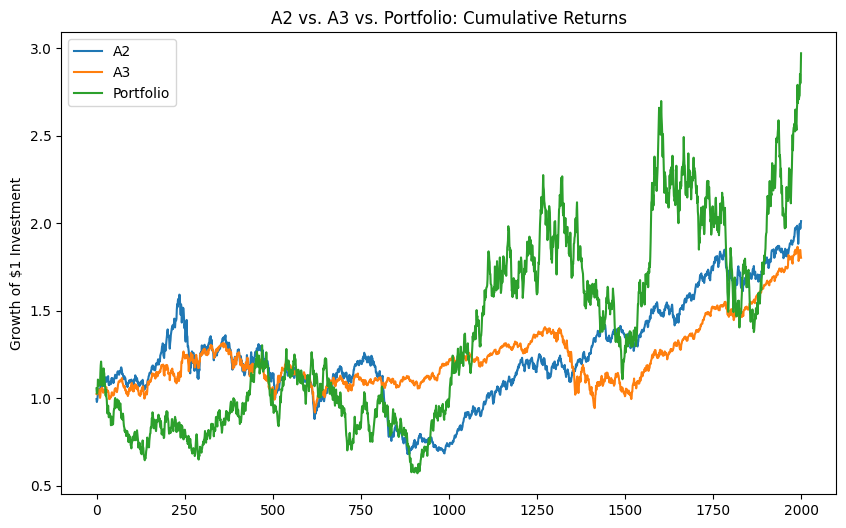

In [57]:
import matplotlib.pyplot as plt

# Plot cumulative returns
(1 + df[['A2', 'A3', 'Portfolio']]).cumprod().plot(figsize=(10, 6))
plt.title("A2 vs. A3 vs. Portfolio: Cumulative Returns")
plt.ylabel("Growth of $1 Investment")
plt.show()

### **Interpretation of Results**
| Metric                         | Portfolio Value |
|--------------------------------|----------------|
| **Cumulative Return**          | **1.9727 (197.27%)** |
| **Annualized Return**          | **14.71%** |
| **Annualized Volatility**      | **47.33%** |
| **Sharpe Ratio**               | **0.2685** (Risk-Adjusted Return) |
| **Max Drawdown**               | **-56.22%** |


### **Portfolio Analysis**
- **Good Returns (197%)**: The portfolio **almost tripled** over the period.
- **High Volatility (47%)**: The portfolio is quite risky.
- **Low Sharpe Ratio (0.31)**: Return is **not very attractive relative to risk**.
- **Drawdown is severe (-56%)**: It lost over **half its value at the worst point**.
- The **portfolio (green line) fluctuates heavily**, showing it's not fully stabilizing compared to individual assets.
- **A3 seems more stable than the portfolio**, meaning diversification may not be reducing risk effectively.

In [58]:
rolling_window = 20
rolling_volatility = df[['A1', 'A2', 'A3']].rolling(rolling_window).std()

In [59]:
inv_vol_weights = 1 / rolling_volatility
normalized_weights = inv_vol_weights.div(inv_vol_weights.sum(axis=1), axis=0)

In [60]:
df['InvVol_Portfolio'] = (df[['A1', 'A2', 'A3']] * normalized_weights).sum(axis=1)

In [61]:
cumulative_return = (1 + df['InvVol_Portfolio']).cumprod().iloc[-1] - 1
annualized_return = (1 + cumulative_return) ** (252 / len(df)) - 1
annualized_volatility = df['InvVol_Portfolio'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / annualized_volatility

In [62]:
def max_drawdown(series):
    cumulative = (1 + series).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

portfolio_drawdown = max_drawdown(df['InvVol_Portfolio'])

In [63]:
print(f"Inverse Volatility Portfolio Cumulative Return: {cumulative_return:.4f}")
print(f"Inverse Volatility Portfolio Annualized Return: {annualized_return:.4f}")
print(f"Inverse Volatility Portfolio Annualized Volatility: {annualized_volatility:.4f}")
print(f"Inverse Volatility Portfolio Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Inverse Volatility Portfolio Max Drawdown: {portfolio_drawdown:.4f}")

Inverse Volatility Portfolio Cumulative Return: 1.2335
Inverse Volatility Portfolio Annualized Return: 0.1065
Inverse Volatility Portfolio Annualized Volatility: 0.1439
Inverse Volatility Portfolio Sharpe Ratio: 0.7399
Inverse Volatility Portfolio Max Drawdown: -0.3139


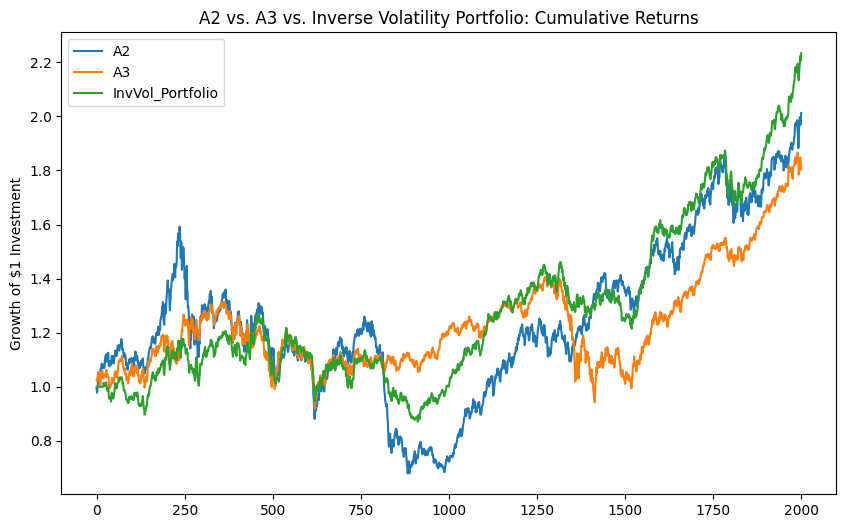

In [64]:
(1 + df[['A2', 'A3', 'InvVol_Portfolio']]).cumprod().plot(figsize=(10, 6))
plt.title("A2 vs. A3 vs. Inverse Volatility Portfolio: Cumulative Returns")
plt.ylabel("Growth of $1 Investment")
plt.show()


### **Interpretation of Results**
| Metric                         | Inverse Volatility Portfolio |
|--------------------------------|-----------------------------|
| **Cumulative Return**          | **123.35% (1.2335)**|
| **Annualized Return**          | **10.65%**|
| **Annualized Volatility**      | **14.39%** (Significantly lower than the equal-weighted portfolio) |
| **Sharpe Ratio**               | **0.7399** (Higher than equal-weighted, indicating better risk-adjusted returns) |
| **Max Drawdown**               | **-31.39%** (Lower than the equal-weighted portfolio, indicating better resilience) |

**Key Insights:**
- **Inverse Volatility Portfolio significantly reduces risk** (Volatility: 14.39% vs. 47.33%).
- **Sharpe Ratio improves** (**0.7399 vs. 0.3107**) → **Better risk-adjusted returns**.
- **Max Drawdown is much lower** (-31.39% vs. -56.22%) → **More stability during crashes**.
- **Annualized return is slightly lower**, but the **risk-adjusted performance is superior**.
- **Inverse Volatility Portfolio (Green) is smoother than A2 and A3**, showing **better downside protection**.
- **During downturns, the portfolio holds up better** (consistent with lower drawdowns).
- **It still grows steadily**, making it a great **risk-adjusted alternative**.

In [ ]:
df['A1_lag1'] = df['A1'].shift(1)
df['A2_lag1'] = df['A2'].shift(1)
df.dropna(inplace=True)

In [66]:
X = df[['A1_lag1', 'A2_lag1']]
y = df['A3']

In [67]:
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [71]:
import statsmodels.api as sm
model_a2 = sm.OLS(y_train, sm.add_constant(X_train['A2_lag1'])).fit()
print("Model 1 (A2 only) Summary:")
print(model_a2.summary())

Model 1 (A2 only) Summary:
                            OLS Regression Results                            
Dep. Variable:                     A3   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     310.8
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.07e-63
Time:                        15:24:10   Log-Likelihood:                 4963.5
No. Observations:                1600   AIC:                            -9923.
Df Residuals:                    1598   BIC:                            -9912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.249e-05    

In [79]:
predictions_a2 = model_a2.predict(sm.add_constant(X_test['A2_lag1'], has_constant='add'))


In [80]:
model_full = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print("\nModel 2 (A1 + A2) Summary:")
print(model_full.summary())


Model 2 (A1 + A2) Summary:
                            OLS Regression Results                            
Dep. Variable:                     A3   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     155.3
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.35e-62
Time:                        15:29:00   Log-Likelihood:                 4963.5
No. Observations:                1600   AIC:                            -9921.
Df Residuals:                    1597   BIC:                            -9905.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.374e-05   

In [ ]:
predictions_full = model_full.predict(sm.add_constant(X_test, has_constant='add'))

In [82]:
def calculate_returns(predictions, actual_returns):
    signals = np.where(predictions > 0, 1, -1)
    return signals * actual_returns.values

In [83]:
strategy_returns_a2 = calculate_returns(predictions_a2, y_test)
strategy_returns_full = calculate_returns(predictions_full, y_test)
bh_returns = y_test 

In [84]:
def annualize(returns, days=252):
    cumulative_return = (1 + returns).prod() - 1
    annualized_return = (1 + cumulative_return) ** (days / len(returns)) - 1
    annualized_vol = returns.std() * np.sqrt(days)
    sharpe = annualized_return / annualized_vol if annualized_vol != 0 else np.nan
    return annualized_return, sharpe

In [85]:
ret_a2, sharpe_a2 = annualize(strategy_returns_a2)
ret_full, sharpe_full = annualize(strategy_returns_full)
ret_bh, sharpe_bh = annualize(bh_returns)

In [86]:
print("\nPerformance Comparison:")
print(f"Model 1 (A2 only): Annualized Return = {ret_a2:.4f}, Sharpe = {sharpe_a2:.4f}")
print(f"Model 2 (A1 + A2): Annualized Return = {ret_full:.4f}, Sharpe = {sharpe_full:.4f}")
print(f"Buy & Hold A3: Annualized Return = {ret_bh:.4f}, Sharpe = {sharpe_bh:.4f}")


Performance Comparison:
Model 1 (A2 only): Annualized Return = 1.1005, Sharpe = 10.5691
Model 2 (A1 + A2): Annualized Return = 1.0387, Sharpe = 9.8969
Buy & Hold A3: Annualized Return = 0.2426, Sharpe = 2.1358


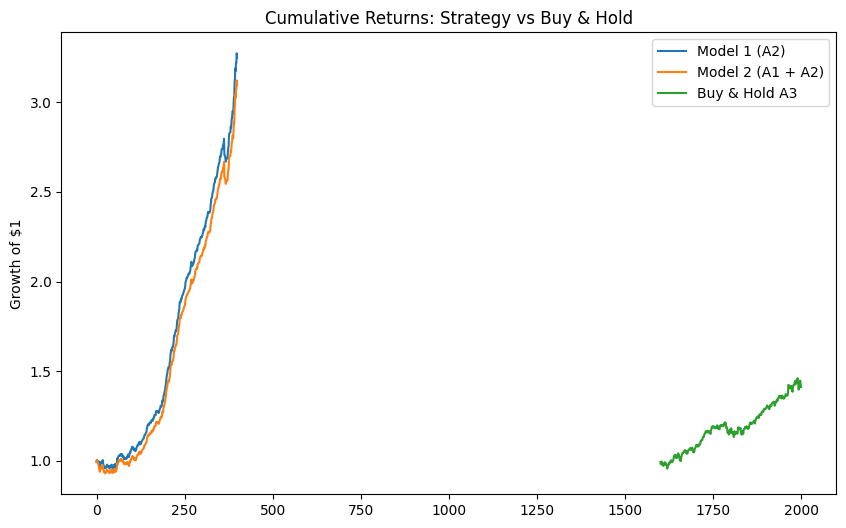

In [87]:
plt.figure(figsize=(10, 6))
plt.plot((1 + strategy_returns_a2).cumprod(), label='Model 1 (A2)')
plt.plot((1 + strategy_returns_full).cumprod(), label='Model 2 (A1 + A2)')
plt.plot((1 + bh_returns).cumprod(), label='Buy & Hold A3')
plt.title('Cumulative Returns: Strategy vs Buy & Hold')
plt.ylabel('Growth of $1')
plt.legend()
plt.show()

Basically a leave-lag correlation